<a href="https://colab.research.google.com/github/ZrowGz/trading-bot/blob/viny/NNTest2_52_53_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [ ]:
from google.colab import files

csv_file = files.upload()

Saving btc_metrics.csv to btc_metrics.csv


In [ ]:
# Read the bitcoin Glassnode indicator data into a Pandas DataFrame
btc_dfa = pd.read_csv("btc_metrics.csv")

# Review the DataFrame
btc_dfa.head()

,date,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,stablecoin_supply,rhodl,cvdd,rpv,balanced_price,investor_capitalization
0,2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,NaN,336.693607,169.528788,0.000537,232.840772,3.017275e+09
1,2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,NaN,322.022994,169.513770,0.000265,232.941445,3.017969e+09
2,2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,NaN,328.552037,169.551559,0.000715,233.108481,3.019992e+09
3,2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,NaN,313.990154,169.582557,0.000692,233.317436,3.022417e+09
4,2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,NaN,324.924804,169.652235,0.000679,233.463981,3.024257e+09


In [ ]:

#Drop unwanted indicator
btc_df = btc_dfa.drop(columns=["stablecoin_supply", "date", "balanced_price", "investor_capitalization", "exchange_netflow", "rhodl" ])
btc_df = btc_df.dropna()
btc_df_pct = btc_df.pct_change()
btc_df_pct = btc_df_pct.dropna()
btc_df_pct

btc_df_pct["BS"] =  np.where(btc_df_pct['price']<0, 0, 1)
btc_df_pct = btc_df_pct.dropna()
#shift 1/0 indicator back 1 so indicators are leading
btc_df_pct["BS"] = btc_df_pct["BS"].shift(-1)
#drop unwanted data, but preserve for future use in new dataframe
btc_df_pct = btc_df_pct.dropna()
btc_price = pd.DataFrame(btc_df_pct["price"], columns=['price'])
btc_price
btc_df_pct = btc_df_pct.drop(columns=["price"])
btc_df_pct


,a_sopr,puell_multiple,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,cvdd,rpv,BS
1,-0.011357,0.076049,0.012950,-0.000692,-0.002224,-0.005097,0.001311,-0.006122,-0.000089,-0.506938,0.0
2,0.009113,-0.008830,0.012483,-0.028989,0.002783,-0.013326,-0.008795,-0.018262,0.000223,1.699055,1.0
3,0.000521,0.251820,0.012204,0.018821,0.001229,0.008716,0.005673,0.009969,0.000183,-0.032467,0.0
4,-0.006622,-0.133829,0.011930,-0.006453,0.001150,-0.010395,-0.002158,-0.007136,0.000411,-0.019158,0.0
5,-0.000262,-0.106262,0.011664,-0.025605,0.001466,-0.008586,-0.004675,-0.009580,0.000246,-0.143638,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2156,-0.071736,-0.034950,-0.004072,-0.150081,0.001221,-0.051466,-0.045221,-0.067095,0.001612,-0.778106,1.0
2157,0.007310,0.066665,-0.003891,0.025221,0.002525,0.005303,-0.006675,0.012095,0.000240,-0.650186,1.0
2158,0.012680,-0.032295,-0.015690,0.084864,-0.000093,0.029695,0.013398,0.037445,0.000764,0.990592,1.0
2159,0.016144,0.084099,-0.012804,0.021979,0.000927,0.008309,0.060764,0.006474,0.001366,1.177779,0.0


In [ ]:
# Define features set X by selecting all columns but DEFAULT
X = btc_df_pct.drop(columns=["BS"]).copy()

# Display the features DataFrame
X.head()

,a_sopr,puell_multiple,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,cvdd,rpv
1,-0.011357,0.076049,0.012950,-0.000692,-0.002224,-0.005097,0.001311,-0.006122,-0.000089,-0.506938
2,0.009113,-0.008830,0.012483,-0.028989,0.002783,-0.013326,-0.008795,-0.018262,0.000223,1.699055
3,0.000521,0.251820,0.012204,0.018821,0.001229,0.008716,0.005673,0.009969,0.000183,-0.032467
4,-0.006622,-0.133829,0.011930,-0.006453,0.001150,-0.010395,-0.002158,-0.007136,0.000411,-0.019158
5,-0.000262,-0.106262,0.011664,-0.025605,0.001466,-0.008586,-0.004675,-0.009580,0.000246,-0.143638


In [ ]:
# Define target set by selecting the DEFAULT column
y = btc_df_pct["BS"]

# Display a sample y
y[:5]

1    0.0
2    1.0
3    0.0
4    0.0
5    1.0
Name: BS, dtype: float64

In [ ]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [ ]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Define the the number of inputs to the model
number_inputs = 10

# Define the number of hidden nodes for the model
number_hidden_nodes = 7

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="sigmoid"))

In [ ]:
neuron.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 77        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Compile the Sequential model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model using 100 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
51/51 [==============================] - 1s 2ms/step - loss: 0.7402 - accuracy: 0.4685
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.4858
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.4926
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5099
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5253
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5302
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5401
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5432
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5506
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5543
Epoch 11/

In [ ]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

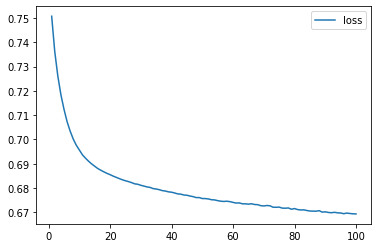

In [ ]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

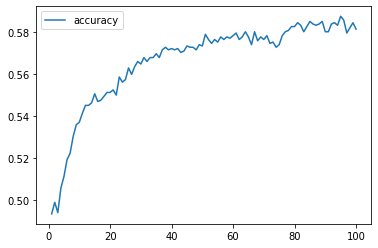

In [ ]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

17/17 - 0s - loss: 0.6964 - accuracy: 0.5352 - 127ms/epoch - 7ms/step
Loss: 0.6964443922042847, Accuracy: 0.5351851582527161
